In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
HDBSCAN = pd.read_csv('HDBSCAN.csv')
louvain = pd.read_csv('Louvain.csv')

merged_table = pd.merge(HDBSCAN, louvain, on="Utterance", how="outer", indicator=True)

merged_table['Source'] = merged_table['_merge'].replace({
    'both': 'both',
    'left_only': 'HDBSCAN',
    'right_only': 'louvain'
})


merged_table.drop(columns=['_merge'], inplace=True)
merged_table.to_csv('outcomes.csv', index=False)

In [ ]:
mean_cluster_confidence_hdbscan = HDBSCAN['cluster_confidence'].mean()
mean_cluster_confidence_hdbscan

0.567726820470852

In [ ]:
mean_cluster_confidence_louvain = louvain['cluster_confidence'].mean()
mean_cluster_confidence_louvain

0.5275112104530386

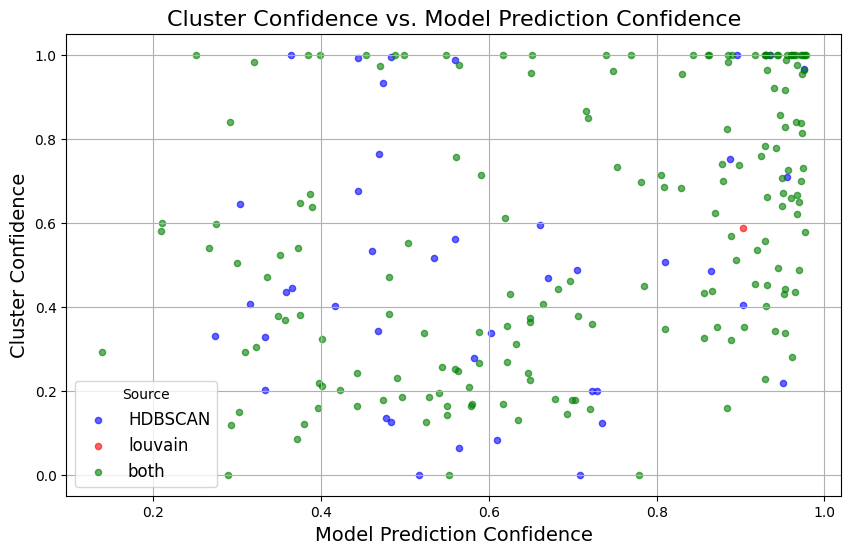

In [ ]:
merged_table['Predicted Confidence'] = merged_table.apply(
    lambda row: row['predicted_confidence_x'] if row['Source'] in ['HDBSCAN', 'both'] else row['predicted_confidence_y'], axis=1)
merged_table['Cluster Confidence'] = merged_table.apply(
    lambda row: row['cluster_confidence_x'] if row['Source'] in ['HDBSCAN', 'both'] else row['cluster_confidence_y'], axis=1)

plot_data = merged_table[['Predicted Confidence','Cluster Confidence','Source']].dropna()

colors = {'HDBSCAN': 'blue', 'louvain': 'red', 'both': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))

grouped = plot_data.groupby('Source')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Predicted Confidence', y='Cluster Confidence',
               label=key, color=colors[key], alpha=0.6)

plt.title('Cluster Confidence vs. Model Prediction Confidence',  fontsize=16)
plt.xlabel('Model Prediction Confidence', fontsize=14)
plt.ylabel('Cluster Confidence', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.grid(True)
plt.show()

In 'both' category, use Louvain's Predicted Confidence and Cluster Confidence

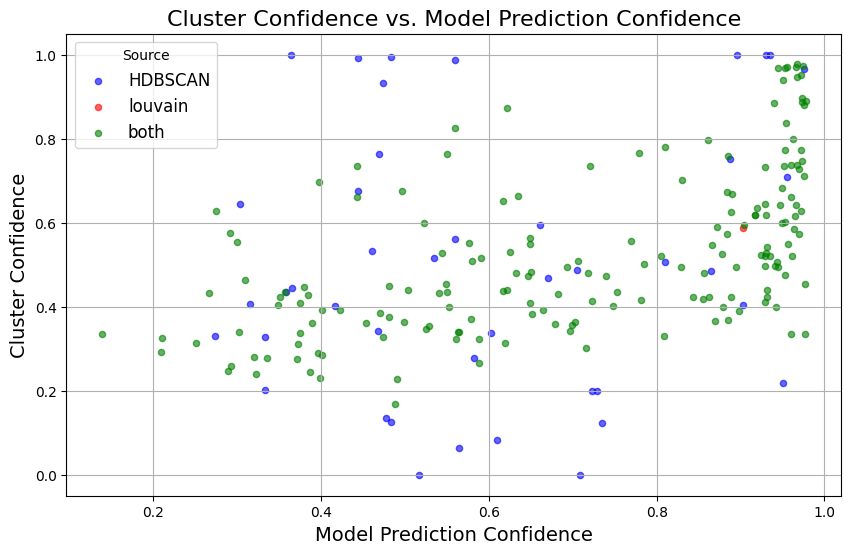

In [ ]:
merged_table['Unified Predicted Confidence'] = merged_table.apply(
    lambda row: row['predicted_confidence_x'] if row['Source'] == 'HDBSCAN' else row['predicted_confidence_y'], axis=1)
merged_table['Unified Cluster Confidence'] = merged_table.apply(
    lambda row: row['cluster_confidence_x'] if row['Source'] == 'HDBSCAN' else row['cluster_confidence_y'], axis=1)

plot_data = merged_table[['Unified Predicted Confidence', 'Unified Cluster Confidence', 'Source']].dropna()

colors = {'HDBSCAN': 'blue', 'louvain': 'red', 'both': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))
grouped = plot_data.groupby('Source')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Unified Predicted Confidence', y='Unified Cluster Confidence',
               label=key, color=colors[key], alpha=0.6)

plt.title('Cluster Confidence vs. Model Prediction Confidence',  fontsize=16)
plt.xlabel('Model Prediction Confidence', fontsize=14)
plt.ylabel('Cluster Confidence', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
merged_table['topic_mismatch'] = (merged_table['Topic_x'] != merged_table['Topic_y']) & merged_table['Topic_x'].notna() & merged_table['Topic_y'].notna()
topic_mismatches = merged_table[merged_table['topic_mismatch']]
len(topic_mismatches)

5

In [ ]:
topic_mismatches

,Algorithm_x,Error Reason_x,Utterance,Assigned label_x,predicted_label_x,predicted_confidence_x,cluster_confidence_x,assigned_topic_x,predicted_topic_x,Topic_x,...,cluster_confidence_y,assigned_topic_y,predicted_topic_y,Topic_y,Source,Predicted Confidence,Cluster Confidence,Unified Predicted Confidence,Unified Cluster Confidence,topic_mismatch
24,HDBSCAN,Model Error,My credit card was declined.,declined_card_payment,top_up_failed,0.748468,0.961018,card_malfunction,top_up,Without,...,0.401856,card_malfunction,card_malfunction,Within,both,0.748468,0.961018,0.748468,0.401856,True
116,HDBSCAN,Model Error,The NFC payment wouldn't work on the bus today...,contactless_not_working,declined_card_payment,0.267034,0.539398,card_malfunction,card_malfunction,Within,...,0.432340,card_malfunction,transfers,Without,both,0.267034,0.539398,0.267036,0.432340,True
188,HDBSCAN,Mislabel,What are your policies for card transfers?,failed_transfer,transfer_into_account,0.138376,0.291507,transfers,transfers,Within,...,0.335398,transfers,virtual_disposable_cards,Without,both,0.138376,0.291507,0.138376,0.335398,True
191,HDBSCAN,Model Error,How does a transfer work?,transfer_into_account,declined_transfer,0.308996,0.291312,transfers,transfers,Within,...,0.464134,transfers,top_up,Without,both,0.308996,0.291312,0.308996,0.464134,True
197,HDBSCAN,Vague,how do VR cards work,get_disposable_virtual_card,getting_virtual_card,0.374894,0.648086,virtual_disposable_cards,virtual_disposable_cards,Within,...,0.408820,virtual_disposable_cards,new_card,Without,both,0.374894,0.648086,0.374893,0.408820,True


In [ ]:
hdbscan_without = HDBSCAN[HDBSCAN['Topic'] == 'Without']
louvain_without = louvain[louvain['Topic'] == 'Without']

In [ ]:
hdbscan_with = HDBSCAN[HDBSCAN['Topic'] == 'Within']
louvain_with = louvain[louvain['Topic'] == 'Within']

In [ ]:
merged_table_with = pd.merge(hdbscan_with, louvain_with, on="Utterance", how="outer", indicator=True)

merged_table_with['Source'] = merged_table_with['_merge'].replace({
    'both': 'Both',
    'left_only': 'HDBSCAN',
    'right_only': 'Louvain'
})


merged_table_with.drop(columns=['_merge'], inplace=True)
merged_table_with.to_csv('outcomes_with.csv', index=False)

In [ ]:
mean_cluster_confidence_hdbscan_with = merged_table_with['cluster_confidence_x'].mean()
mean_cluster_confidence_hdbscan_with

0.5400800190075188

In [ ]:
mean_cluster_confidence_louvain_with = merged_table_with['cluster_confidence_y'].mean()
mean_cluster_confidence_louvain_with

0.57366399665

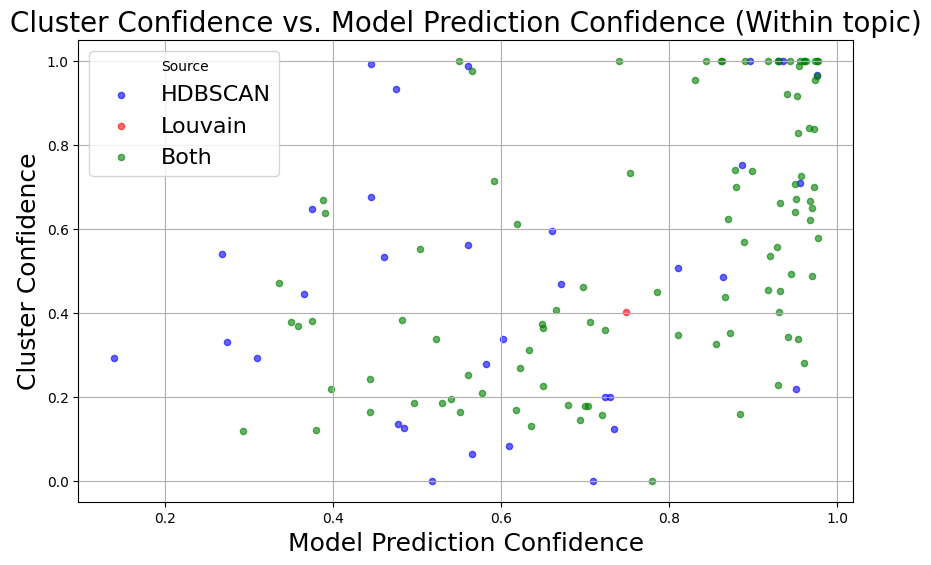

In [ ]:
merged_table_with['Predicted Confidence'] = merged_table_with.apply(
    lambda row: row['predicted_confidence_x'] if row['Source'] in ['HDBSCAN', 'Both'] else row['predicted_confidence_y'], axis=1)
merged_table_with['Cluster Confidence'] = merged_table_with.apply(
    lambda row: row['cluster_confidence_x'] if row['Source'] in ['HDBSCAN', 'Both'] else row['cluster_confidence_y'], axis=1)

plot_data_1 = merged_table_with[['Predicted Confidence', 'Cluster Confidence',  'Source']]

colors = {'HDBSCAN': 'blue', 'Louvain': 'red', 'Both': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))

grouped_1 = plot_data_1.groupby('Source')
for key, group in grouped_1:
    group.plot(ax=ax, kind='scatter', x='Predicted Confidence', y='Cluster Confidence',
               label=key, color=colors[key], alpha=0.6)

plt.title('Cluster Confidence vs. Model Prediction Confidence (Within topic)',  fontsize=20)
plt.xlabel('Model Prediction Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)
plt.legend(title='Source', fontsize=16)
plt.grid(True)
plt.show()

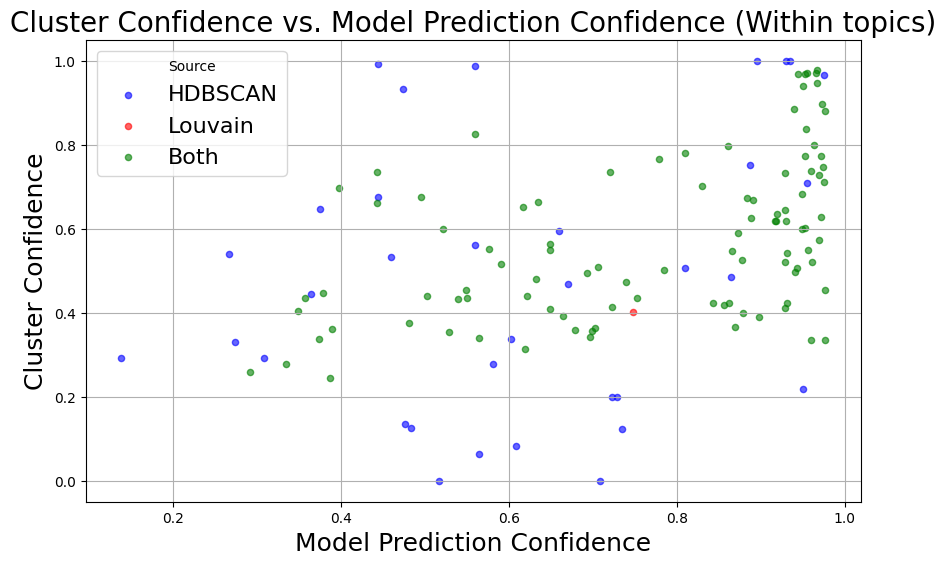

In [ ]:
merged_table_with['Unified Predicted Confidence'] = merged_table_with.apply(
    lambda row: row['predicted_confidence_x'] if row['Source'] == 'HDBSCAN' else row['predicted_confidence_y'], axis=1)
merged_table_with['Unified Cluster Confidence'] = merged_table_with.apply(
    lambda row: row['cluster_confidence_x'] if row['Source'] == 'HDBSCAN' else row['cluster_confidence_y'], axis=1)

plot_data_2 = merged_table_with[['Unified Predicted Confidence', 'Unified Cluster Confidence', 'Source']]

colors = {'HDBSCAN': 'blue', 'Louvain': 'red', 'Both': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))
grouped_2 = plot_data_2.groupby('Source')
for key, group in grouped_2:
    group.plot(ax=ax, kind='scatter', x='Unified Predicted Confidence', y='Unified Cluster Confidence',
               label=key, color=colors[key], alpha=0.6)

plt.title('Cluster Confidence vs. Model Prediction Confidence (Within topics)',  fontsize=20)
plt.xlabel('Model Prediction Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)
plt.legend(title='Source', fontsize=16)
plt.grid(True)
plt.show()

In [ ]:

merged_table_without = pd.merge(hdbscan_without, louvain_without, on="Utterance", how="outer", indicator=True)

merged_table_without['Source'] = merged_table_without['_merge'].replace({
    'both': 'Both',
    'left_only': 'HDBSCAN',
    'right_only': 'Louvain'
})


merged_table_without.drop(columns=['_merge'], inplace=True)
merged_table_without.to_csv('outcomes_without.csv', index=False)

In [ ]:
merged_table_without

,Algorithm_x,Error Reason_x,Utterance,Assigned label_x,predicted_label_x,predicted_confidence_x,cluster_confidence_x,assigned_topic_x,predicted_topic_x,Topic_x,Algorithm_y,Error Reason_y,Assigned label_y,predicted_label_y,predicted_confidence_y,cluster_confidence_y,assigned_topic_y,predicted_topic_y,Topic_y,Source
0,HDBSCAN,Model Error,I was contacted by a seller with a message tha...,reverted_card_payment?,Refund_not_showing_up,0.384072,1.0,card_payment,transactions,Without,Louvain,Model Error,reverted_card_payment?,Refund_not_showing_up,0.384072,0.426926,card_payment,transactions,Without,Both
1,HDBSCAN,Model Error,The balance on my account wasn't updated after...,balance_not_updated_after_cheque_or_cash_deposit,balance_not_updated_after_bank_transfer,0.769603,1.0,transactions,transfers,Without,Louvain,Mislabeled,balance_not_updated_after_cheque_or_cash_deposit,balance_not_updated_after_bank_transfer,0.769603,0.556587,transactions,transfers,Without,Both
2,HDBSCAN,Model Error,My non-physical card will not work,virtual_card_not_working,card_not_working,0.965674,1.0,virtual_disposable_cards,card_malfunction,Without,Louvain,Mislabeled,virtual_card_not_working,card_not_working,0.965674,0.642891,virtual_disposable_cards,card_malfunction,Without,Both
3,HDBSCAN,Mislabel,Why did I get charged for something I bought o...,transfer_fee_charged,card_payment_fee_charged,0.398525,1.0,transfers,card_payment,Without,Louvain,Model Error,transfer_fee_charged,card_payment_fee_charged,0.398525,0.231140,transfers,exchange_rate_currency,Without,Both
4,HDBSCAN,Mislabel,What should I do to get transactions off of my...,card_payment_not_recognised,compromised_card,0.944862,1.0,card_payment,new_card,Without,Louvain,Mislabeled,card_payment_not_recognised,compromised_card,0.944862,0.493699,card_payment,new_card,Without,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,Why am I being charged more ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louvain,Model Error,card_payment_wrong_exchange_rate,card_payment_fee_charged,0.903134,0.586790,exchange_rate_currency,card_payment,Without,Louvain
91,NaN,NaN,The NFC payment wouldn't work on the bus today...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louvain,Model Error,contactless_not_working,declined_card_payment,0.267036,0.432340,card_malfunction,transfers,Without,Louvain
92,NaN,NaN,What are your policies for card transfers?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louvain,Model Error,failed_transfer,transfer_into_account,0.138376,0.335398,transfers,virtual_disposable_cards,Without,Louvain
93,NaN,NaN,How does a transfer work?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louvain,Vague,transfer_into_account,declined_transfer,0.308996,0.464134,transfers,top_up,Without,Louvain


In [ ]:
mean_cluster_confidence_hdbscan_2 = merged_table_without['cluster_confidence_x'].mean()
mean_cluster_confidence_hdbscan_2

0.6085826493000001

In [ ]:
mean_cluster_confidence_louvain_2 = merged_table_without['cluster_confidence_y'].mean()
mean_cluster_confidence_louvain_2

0.47053246206172844

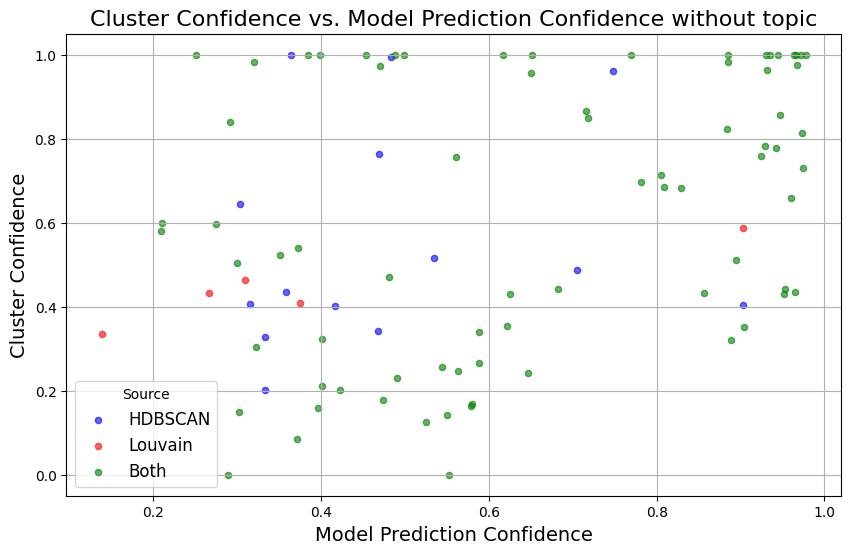

In [ ]:
merged_table_without['Predicted Confidence'] = merged_table_without.apply(
    lambda row: row['predicted_confidence_x'] if row['Source'] in ['HDBSCAN', 'Both'] else row['predicted_confidence_y'], axis=1)
merged_table_without['Cluster Confidence'] = merged_table_without.apply(
    lambda row: row['cluster_confidence_x'] if row['Source'] in ['HDBSCAN', 'Both'] else row['cluster_confidence_y'], axis=1)

plot_data = merged_table_without[['Predicted Confidence', 'Cluster Confidence',  'Source']]

colors = {'HDBSCAN': 'blue', 'Louvain': 'red', 'Both': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))

grouped = plot_data.groupby('Source')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Predicted Confidence', y='Cluster Confidence',
               label=key, color=colors[key], alpha=0.6)

plt.title('Cluster Confidence vs. Model Prediction Confidence without topic',  fontsize=16)
plt.xlabel('Model Prediction Confidence', fontsize=14)
plt.ylabel('Cluster Confidence', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.grid(True)
plt.show()

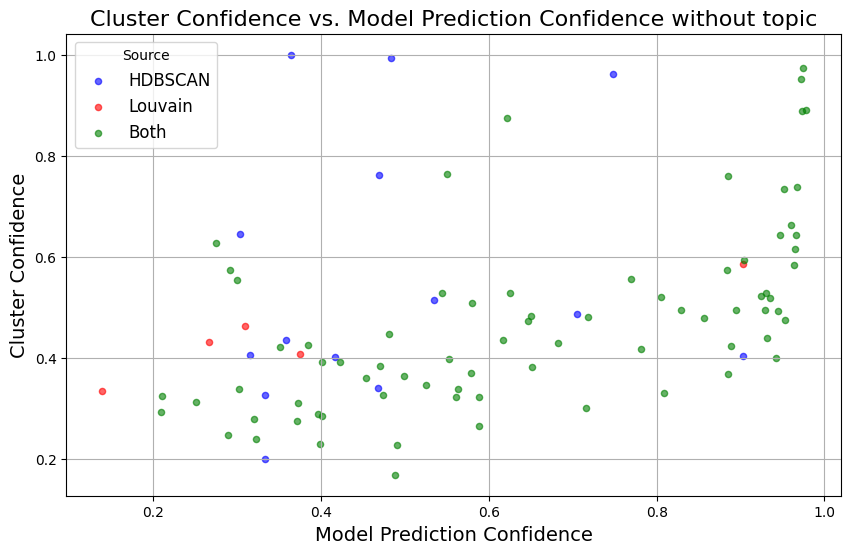

In [ ]:
merged_table_without['Unified Predicted Confidence'] = merged_table_without.apply(
    lambda row: row['predicted_confidence_x'] if row['Source'] == 'HDBSCAN' else row['predicted_confidence_y'], axis=1)
merged_table_without['Unified Cluster Confidence'] = merged_table_without.apply(
    lambda row: row['cluster_confidence_x'] if row['Source'] == 'HDBSCAN' else row['cluster_confidence_y'], axis=1)

plot_data = merged_table_without[['Unified Predicted Confidence', 'Unified Cluster Confidence', 'Source']].dropna()

colors = {'HDBSCAN': 'blue', 'Louvain': 'red', 'Both': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))
grouped = plot_data.groupby('Source')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Unified Predicted Confidence', y='Unified Cluster Confidence',
               label=key, color=colors[key], alpha=0.6)

plt.title('Cluster Confidence vs. Model Prediction Confidence without topic',  fontsize=16)
plt.xlabel('Model Prediction Confidence', fontsize=14)
plt.ylabel('Cluster Confidence', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.grid(True)
plt.show()

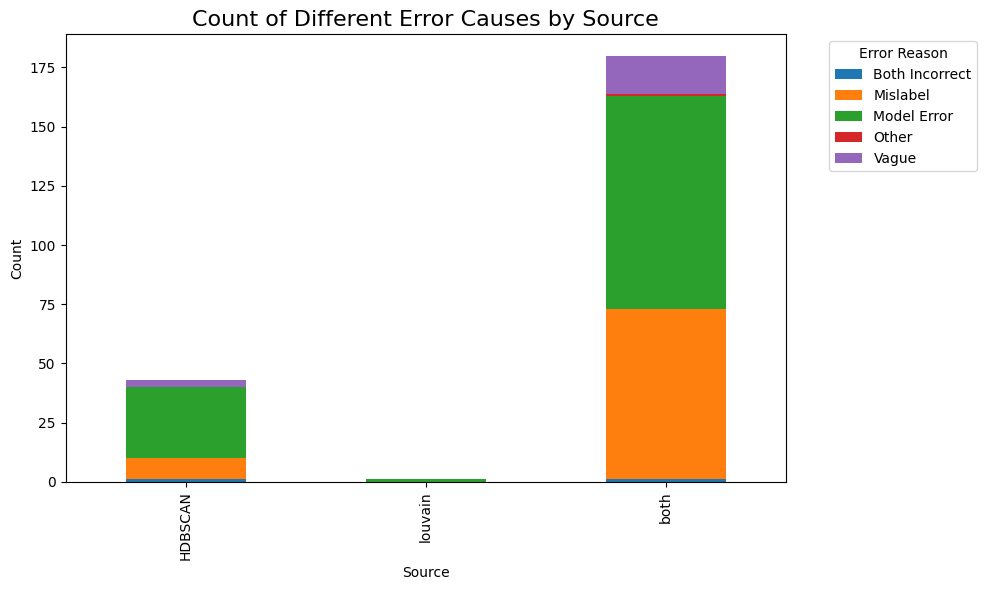

Unified Error Reason  Both Incorrect  Mislabel  Model Error  Other  Vague
Source                                                                   
HDBSCAN                            1         9           30      0      3
louvain                            0         0            1      0      0
both                               1        72           90      1     16


In [ ]:
merged_table['Unified Error Reason'] = merged_table.apply(
    lambda row: row['Error Reason_x'] if row['Source'] in ['HDBSCAN', 'both'] else row['Error Reason_y'], axis=1
)

error_counts_all = merged_table.groupby(['Source', 'Unified Error Reason']).size().unstack(fill_value=0)

error_counts_all.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Different Error Causes by Source',fontsize=16)
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Error Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

print(error_counts_all)

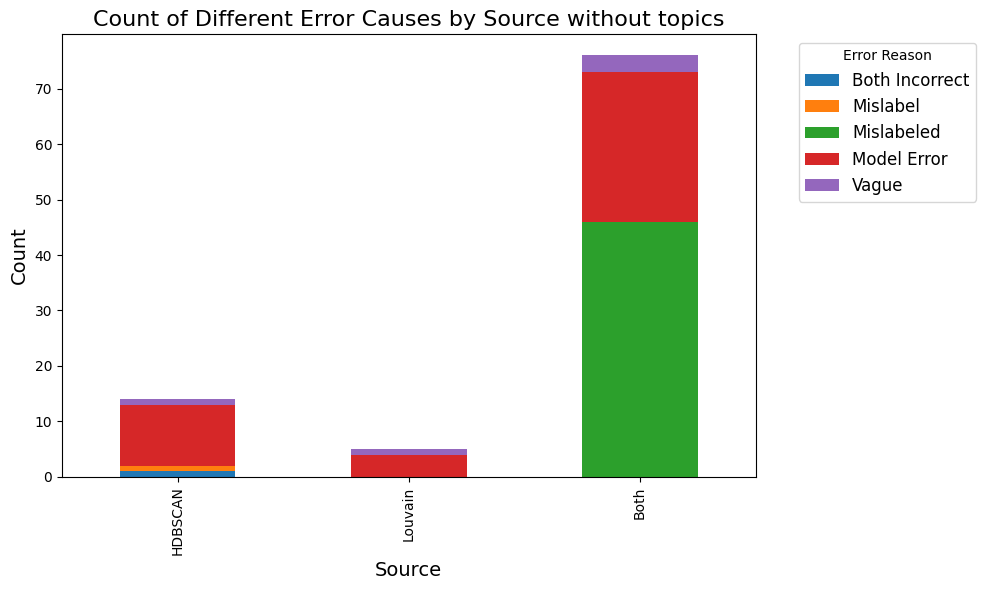

Unified Error Reason  Both Incorrect  Mislabel  Mislabeled  Model Error  Vague
Source                                                                        
HDBSCAN                            1         1           0           11      1
Louvain                            0         0           0            4      1
Both                               0         0          46           27      3


In [ ]:
merged_table_without['Unified Error Reason'] = merged_table_without.apply(
    lambda row: row['Error Reason_x'] if row['Source'] in ['HDBSCAN', 'both'] else row['Error Reason_y'], axis=1
)

error_counts = merged_table_without.groupby(['Source', 'Unified Error Reason']).size().unstack(fill_value=0)

error_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Different Error Causes by Source without topics',fontsize=16)
plt.xlabel('Source',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.legend(title='Error Reason', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12)
plt.tight_layout()

plt.show()

print(error_counts)

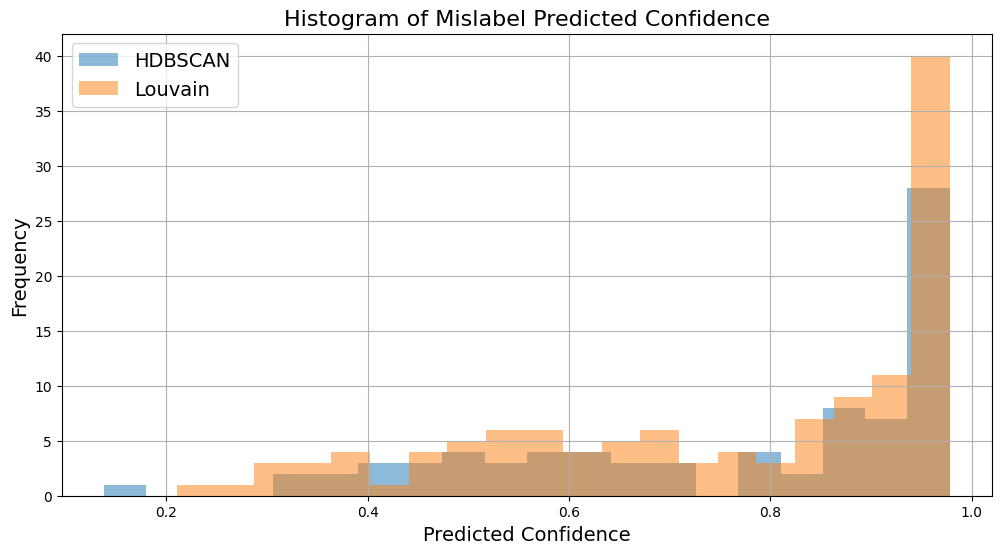

In [ ]:
hdbscan_mislabels = HDBSCAN[HDBSCAN['Error Reason'] == 'Mislabel']
louvain_mislabels = louvain[louvain['Error Reason'] == 'Mislabeled']

common_mislabels = pd.merge(hdbscan_mislabels, louvain_mislabels, on='Utterance', how='inner')
unique_hdbscan_mislabels = hdbscan_mislabels[~hdbscan_mislabels['Utterance'].isin(common_mislabels['Utterance'])]
unique_louvain_mislabels = louvain_mislabels[~louvain_mislabels['Utterance'].isin(common_mislabels['Utterance'])]
num_common_mislabels = len(common_mislabels)
num_unique_hdbscan_mislabels = len(unique_hdbscan_mislabels)
num_unique_louvain_mislabels = len(unique_louvain_mislabels)


hdbscan_mislabels_probabilities = hdbscan_mislabels['predicted_confidence'].dropna()
louvain_mislabels_probabilities = louvain_mislabels['predicted_confidence'].dropna()
plt.figure(figsize=(12, 6))
plt.hist(hdbscan_mislabels_probabilities, bins=20, alpha=0.5, label='HDBSCAN')
plt.hist(louvain_mislabels_probabilities, bins=20, alpha=0.5, label='Louvain')
plt.xlabel('Predicted Confidence',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of Mislabel Predicted Confidence',fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
common_mislabels

,Algorithm_x,Error Reason_x,Utterance,Assigned label_x,predicted_label_x,predicted_confidence_x,cluster_confidence_x,assigned_topic_x,predicted_topic_x,Topic_x,Algorithm_y,Error Reason_y,Assigned label_y,predicted_label_y,predicted_confidence_y,cluster_confidence_y,assigned_topic_y,predicted_topic_y,Topic_y
0,HDBSCAN,Mislabel,What should I do to get transactions off of my...,card_payment_not_recognised,compromised_card,0.944862,1.000000,card_payment,new_card,Without,Louvain,Mislabeled,card_payment_not_recognised,compromised_card,0.944862,0.493699,card_payment,new_card,Without
1,HDBSCAN,Mislabel,Good morning. I tried to make a purchase with ...,declined_transfer,declined_card_payment,0.453353,1.000000,transfers,card_malfunction,Without,Louvain,Mislabeled,declined_transfer,declined_card_payment,0.453353,0.361623,transfers,card_malfunction,Without
2,HDBSCAN,Mislabel,My card is being declined for a purchase. I bo...,reverted_card_payment?,declined_card_payment,0.935384,1.000000,card_payment,card_malfunction,Without,Louvain,Mislabeled,reverted_card_payment?,declined_card_payment,0.935384,0.519682,card_payment,card_malfunction,Without
3,HDBSCAN,Mislabel,When I try and to buy something using my card ...,declined_transfer,declined_card_payment,0.964001,1.000000,transfers,card_malfunction,Without,Louvain,Mislabeled,declined_transfer,declined_card_payment,0.964001,0.584694,transfers,card_malfunction,Without
4,HDBSCAN,Mislabel,I would like to know why my payment is still p...,pending_transfer,pending_card_payment,0.978091,1.000000,transfers,card_payment,Without,Louvain,Mislabeled,pending_transfer,pending_card_payment,0.978091,0.890565,transfers,card_payment,Without
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,HDBSCAN,Mislabel,How long until my transfer will be available t...,balance_not_updated_after_bank_transfer,transfer_timing,0.443070,0.164038,transfers,transfers,Within,Louvain,Mislabeled,balance_not_updated_after_bank_transfer,transfer_timing,0.443068,0.735202,transfers,transfers,Within
61,HDBSCAN,Mislabel,whats your exchange rate,exchange_charge,exchange_rate,0.972351,0.698717,exchange_rate_currency,exchange_rate_currency,Within,Louvain,Mislabeled,exchange_charge,exchange_rate,0.972351,0.772280,exchange_rate_currency,exchange_rate_currency,Within
62,HDBSCAN,Mislabel,Where do I find the exchange rate?,exchange_charge,exchange_rate,0.973205,0.953268,exchange_rate_currency,exchange_rate_currency,Within,Louvain,Mislabeled,exchange_charge,exchange_rate,0.973205,0.897046,exchange_rate_currency,exchange_rate_currency,Within
63,HDBSCAN,Mislabel,Is it okay to use a bank card to top up,top_up_by_card_charge,topping_up_by_card,0.878880,0.699529,top_up,top_up,Within,Louvain,Mislabeled,top_up_by_card_charge,topping_up_by_card,0.878880,0.398618,top_up,top_up,Within


In [ ]:
predicted_label_x_count = common_mislabels['predicted_label_x'].value_counts()
predicted_label_y_count = common_mislabels['predicted_label_y'].value_counts()
if predicted_label_x_count.sum() != predicted_label_y_count.sum():
    print("The number of predicted_label_x is not equal to the number of predicted_label_y.")
else:
    print("The number of predicted_label_x is equal to the number of predicted_label_y.")

print("Counts of predicted_label_x:")
print(predicted_label_x_count)

The number of predicted_label_x is equal to the number of predicted_label_y.
Counts of predicted_label_x:
predicted_label_x
declined_card_payment                      6
failed_transfer                            4
transfer_not_received_by_recipient         4
card_delivery_estimate                     4
transfer_timing                            3
card_not_working                           3
pending_top_up                             3
topping_up_by_card                         3
top_up_failed                              3
lost_or_stolen_card                        3
declined_cash_withdrawal                   3
exchange_rate                              3
country_support                            2
compromised_card                           2
fiat_currency_support                      2
transfer_fee_charged                       2
Refund_not_showing_up                      1
disposable_card_limits                     1
exchange_charge                            1
pending_card_payment 

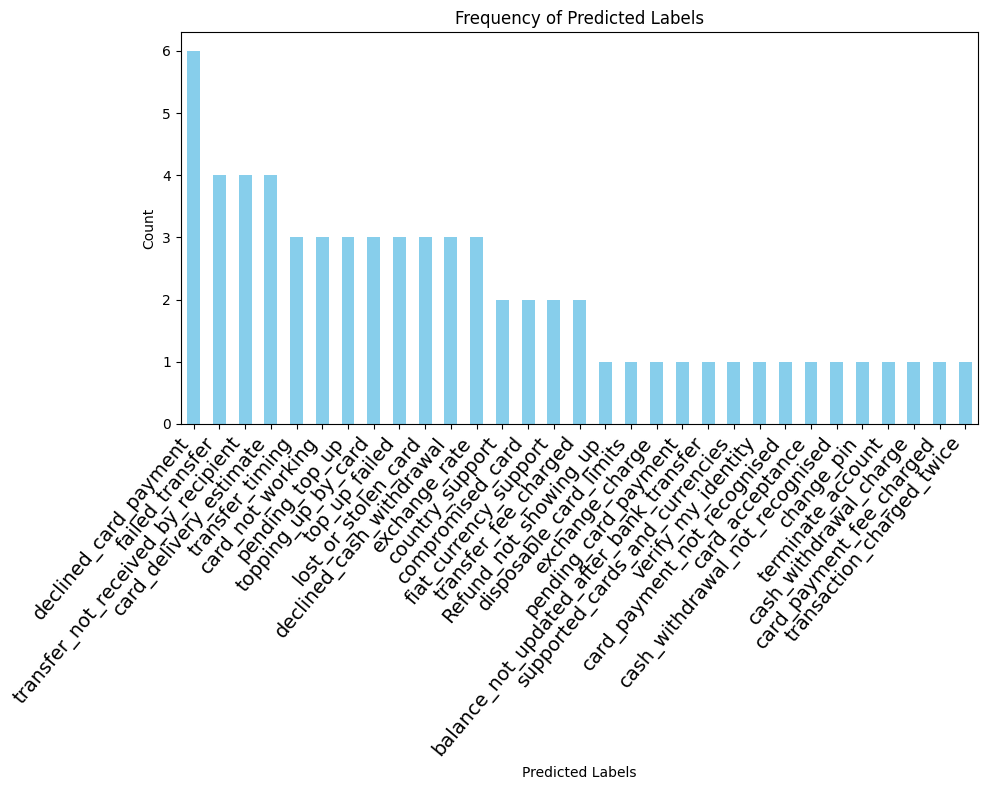

In [ ]:
plt.figure(figsize=(10, 8))
predicted_label_x_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Predicted Labels')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.xticks(rotation=50, ha='right',fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
common_mislabels['labels_not_equal'] = common_mislabels['predicted_label_x'] != common_mislabels['predicted_label_y']


mismatched_labels = common_mislabels[common_mislabels['labels_not_equal']]

if not mismatched_labels.empty:
    print("There are cases where predicted_label_x is not equal to predicted_label_y.")
    print(mismatched_labels)
else:
    print("All predicted_label_x values are equal to predicted_label_y values.")

All predicted_label_x values are equal to predicted_label_y values.


In [ ]:
unique_hdbscan_mislabels

,Algorithm,Error Reason,Utterance,Assigned label,predicted_label,predicted_confidence,cluster_confidence,assigned_topic,predicted_topic,Topic
3,HDBSCAN,Mislabel,Why did I get charged for something I bought o...,transfer_fee_charged,card_payment_fee_charged,0.398525,1.000000,transfers,card_payment,Without
17,HDBSCAN,Mislabel,What type of deposits do you accept into my ac...,top_up_by_cash_or_cheque,transfer_into_account,0.488422,1.000000,top_up,transfers,Without
22,HDBSCAN,Mislabel,The card got declined twice when I tried to us...,declined_transfer,declined_card_payment,0.470067,0.971977,transfers,card_malfunction,Without
31,HDBSCAN,Mislabel,Where can I view my PIN?,pin_blocked,get_physical_card,0.973823,0.814276,account_management,new_card,Without
56,HDBSCAN,Mislabel,Is it possible for me to get money out in a di...,receiving_money,exchange_via_app,0.358504,0.435858,transactions,exchange_rate_currency,Without
102,HDBSCAN,Mislabel,my card was not in the mail again can you advise?,card_delivery_estimate,card_arrival,0.930422,1.000000,new_card,new_card,Within
104,HDBSCAN,Mislabel,Can I get my card expedited?,card_delivery_estimate,card_arrival,0.955514,0.707730,new_card,new_card,Within
108,HDBSCAN,Mislabel,What currency's can i exchange for?,exchange_via_app,fiat_currency_support,0.517039,0.000000,exchange_rate_currency,exchange_rate_currency,Within
127,HDBSCAN,Mislabel,how long do money transfers take?,transfer_not_received_by_recipient,pending_transfer,0.866389,0.437130,transfers,transfers,Within
147,HDBSCAN,Mislabel,I followed the instructions to transfer money ...,topping_up_by_card,top_up_reverted,0.559969,0.986272,top_up,top_up,Within


In [ ]:
predicted_label_counts_hdbscan = unique_hdbscan_mislabels['predicted_label'].value_counts().sort_values(ascending=False)
print(predicted_label_counts_hdbscan)

predicted_label
transfer_into_account       3
card_arrival                2
pending_transfer            2
top_up_reverted             2
card_payment_fee_charged    1
declined_card_payment       1
get_physical_card           1
exchange_via_app            1
fiat_currency_support       1
transfer_timing             1
order_physical_card         1
Name: count, dtype: int64


In [ ]:
unique_louvain_mislabels

,Algorithm,Error Reason,Utterance,Assigned label,predicted_label,predicted_confidence,cluster_confidence,assigned_topic,predicted_topic,Topic
5,Louvain,Mislabeled,Is it a good time to exchange?,exchange_rate,exchange_via_app,0.888302,0.626267,exchange_rate_currency,exchange_rate_currency,Within
8,Louvain,Mislabeled,Where did this fee come from?,extra_charge_on_statement,card_payment_fee_charged,0.964972,0.616606,transactions,card_payment,Without
12,Louvain,Mislabeled,How do I change currencies to euros?,fiat_currency_support,exchange_via_app,0.941125,0.496509,exchange_rate_currency,exchange_rate_currency,Within
13,Louvain,Mislabeled,Am I able to exchange currencies?,fiat_currency_support,exchange_via_app,0.975602,0.712346,exchange_rate_currency,exchange_rate_currency,Within
14,Louvain,Mislabeled,Can I exchange currencies?,fiat_currency_support,exchange_via_app,0.960764,0.520958,exchange_rate_currency,exchange_rate_currency,Within
...,...,...,...,...,...,...,...,...,...,...
160,Louvain,Mislabeled,how does a virtual card work,get_disposable_virtual_card,getting_virtual_card,0.397601,0.697821,virtual_disposable_cards,virtual_disposable_cards,Within
161,Louvain,Mislabeled,Can i get a throw away card,get_disposable_virtual_card,order_physical_card,0.650004,0.483712,virtual_disposable_cards,new_card,Without
166,Louvain,Mislabeled,I didn't get the money I transferred,balance_not_updated_after_bank_transfer,transfer_not_received_by_recipient,0.679181,0.359067,transfers,transfers,Within
170,Louvain,Mislabeled,Why don't I have my transfer?,balance_not_updated_after_bank_transfer,failed_transfer,0.829955,0.702613,transfers,transfers,Within


In [ ]:
predicted_label_counts_louvain = unique_louvain_mislabels['predicted_label'].value_counts().sort_values(ascending=False)
print(predicted_label_counts_louvain)

predicted_label
getting_virtual_card                       5
failed_transfer                            4
balance_not_updated_after_bank_transfer    4
exchange_via_app                           4
getting_spare_card                         3
topping_up_by_card                         3
transfer_not_received_by_recipient         3
top_up_failed                              2
card_not_working                           2
top_up_by_card_charge                      2
direct_debit_payment_not_recognised        2
verify_my_identity                         2
card_payment_wrong_exchange_rate           2
fiat_currency_support                      2
unable_to_verify_identity                  2
country_support                            2
transfer_timing                            2
declined_card_payment                      2
top_up_limits                              1
cash_withdrawal_not_recognised             1
change_pin                                 1
transfer_fee_charged                   

In [ ]:
merged_table

,Algorithm_x,Error Reason_x,Utterance,Assigned label_x,predicted_label_x,predicted_confidence_x,cluster_confidence_x,assigned_topic_x,predicted_topic_x,Topic_x,...,assigned_topic_y,predicted_topic_y,Topic_y,Source,Predicted Confidence,Cluster Confidence,Unified Predicted Confidence,Unified Cluster Confidence,topic_mismatch,Unified Error Reason
0,HDBSCAN,Model Error,I was contacted by a seller with a message tha...,reverted_card_payment?,Refund_not_showing_up,0.384072,1.000000,card_payment,transactions,Without,...,card_payment,transactions,Without,both,0.384072,1.000000,0.384072,0.426926,False,Model Error
1,HDBSCAN,Model Error,The balance on my account wasn't updated after...,balance_not_updated_after_cheque_or_cash_deposit,balance_not_updated_after_bank_transfer,0.769603,1.000000,transactions,transfers,Without,...,transactions,transfers,Without,both,0.769603,1.000000,0.769603,0.556587,False,Model Error
2,HDBSCAN,Model Error,My non-physical card will not work,virtual_card_not_working,card_not_working,0.965674,1.000000,virtual_disposable_cards,card_malfunction,Without,...,virtual_disposable_cards,card_malfunction,Without,both,0.965674,1.000000,0.965674,0.642891,False,Model Error
3,HDBSCAN,Mislabel,Why did I get charged for something I bought o...,transfer_fee_charged,card_payment_fee_charged,0.398525,1.000000,transfers,card_payment,Without,...,transfers,exchange_rate_currency,Without,both,0.398525,1.000000,0.398525,0.231140,False,Mislabel
4,HDBSCAN,Mislabel,What should I do to get transactions off of my...,card_payment_not_recognised,compromised_card,0.944862,1.000000,card_payment,new_card,Without,...,card_payment,new_card,Without,both,0.944862,1.000000,0.944862,0.493699,False,Mislabel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,HDBSCAN,Model Error,How can I verify my indentity?,verify_my_identity,why_verify_identity,0.728950,0.199774,identity_verification,identity_verification,Within,...,NaN,NaN,NaN,HDBSCAN,0.728950,0.199774,0.728950,0.199774,False,Model Error
220,HDBSCAN,Model Error,I need to verify my identity,verify_my_identity,why_verify_identity,0.723252,0.198414,identity_verification,identity_verification,Within,...,NaN,NaN,NaN,HDBSCAN,0.723252,0.198414,0.723252,0.198414,False,Model Error
221,HDBSCAN,Model Error,do the details of my profile have to match my ...,verify_my_identity,why_verify_identity,0.581933,0.277602,identity_verification,identity_verification,Within,...,NaN,NaN,NaN,HDBSCAN,0.581933,0.277602,0.581933,0.277602,False,Model Error
222,HDBSCAN,Model Error,Is there any way to verify who I am?,verify_my_identity,why_verify_identity,0.708795,0.000000,identity_verification,identity_verification,Within,...,NaN,NaN,NaN,HDBSCAN,0.708795,0.000000,0.708795,0.000000,False,Model Error


In [ ]:
copied_table = merged_table.copy()
cleaned_table = copied_table.dropna()
len(cleaned_table)

180

In [ ]:
predicted_label_x_count_2 = cleaned_table['predicted_label_x'].value_counts()
predicted_label_y_count_2 = cleaned_table['predicted_label_y'].value_counts()
if predicted_label_x_count_2.sum() != predicted_label_y_count_2.sum():
    print("The number of predicted_label_x is not equal to the number of predicted_label_y.")
else:
    print("The number of predicted_label_x is equal to the number of predicted_label_y.")

print("Counts of predicted_label_x:")
print(predicted_label_x_count_2)

print("Counts of predicted_label_y:")
print(predicted_label_y_count_2)

The number of predicted_label_x is equal to the number of predicted_label_y.
Counts of predicted_label_x:
predicted_label_x
declined_card_payment                      12
failed_transfer                             9
transfer_not_received_by_recipient          8
topping_up_by_card                          6
balance_not_updated_after_bank_transfer     6
getting_virtual_card                        6
top_up_failed                               5
exchange_via_app                            5
pending_top_up                              5
change_pin                                  5
fiat_currency_support                       5
transfer_timing                             5
card_not_working                            5
pending_transfer                            4
transfer_fee_charged                        4
declined_cash_withdrawal                    4
cash_withdrawal_not_recognised              4
order_physical_card                         4
country_support                             4
lo

In [ ]:
predicted_labels = [
'declined_card_payment',
'failed_transfer',
'transfer_not_received_by_recipient',
'topping_up_by_card',
'balance_not_updated_after_bank_transfer',
'getting_virtual_card'
]

In [ ]:
filtered_data = cleaned_table[cleaned_table['predicted_label_x'].isin(predicted_labels)]
assigned_labels_counts = filtered_data.groupby(['predicted_label_x', 'Assigned label_x']).size().reset_index(name='Occurrences')
assigned_labels_counts

,predicted_label_x,Assigned label_x,Occurrences
0,balance_not_updated_after_bank_transfer,automatic_top_up,1
1,balance_not_updated_after_bank_transfer,balance_not_updated_after_cheque_or_cash_deposit,1
2,balance_not_updated_after_bank_transfer,transfer_not_received_by_recipient,2
3,balance_not_updated_after_bank_transfer,transfer_timing,2
4,declined_card_payment,contactless_not_working,1
5,declined_card_payment,declined_transfer,5
6,declined_card_payment,pending_card_payment,1
7,declined_card_payment,reverted_card_payment?,3
8,declined_card_payment,top_up_failed,2
9,failed_transfer,balance_not_updated_after_bank_transfer,1
